# RADAR CHART


Para este apartado usaré el mismo set de datos, pero lo que haré será seleccionar el consumo de energía per cápita para distintos países, quiero ver la serie de distintos países y cómo es la comparativa entre ellos, para un mismo año.  


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file_path = 'owid-energy-data.csv'
#importo los datos descargados desde la pagina https://ourworldindata.org/energy y veo su estructura
energy_data = pd.read_csv(file_path)
energy_data.head(), energy_data.columns.tolist()

(         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
 0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
 1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
 2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
 3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
 4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   
 
    biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
 0                      NaN                      NaN                  NaN   
 1                      NaN                      NaN                  NaN   
 2                      NaN                      NaN                  NaN   
 3                      NaN                      NaN                  NaN   
 4                      NaN                      NaN                  NaN   
 
    biofuel_elec_per_capita  ...  solar_share_elec  solar_share_en

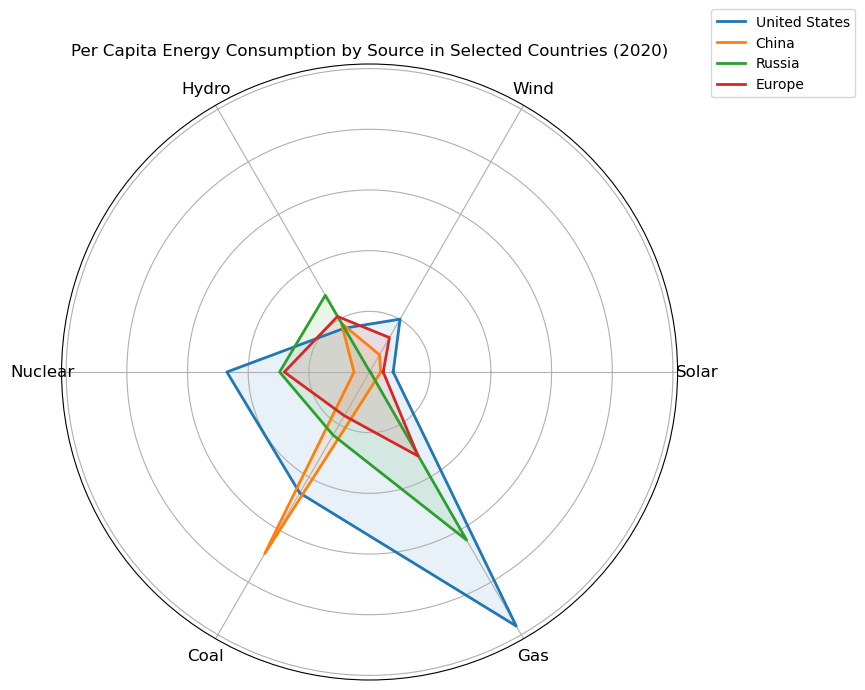

In [7]:
# Seleccionar los países y el año específico para comparar
selected_countries = ['United States', 'China', 'Russia', 'Europe']  
year = 2020
data_selected = energy_data[(energy_data['country'].isin(selected_countries)) & (energy_data['year'] == year)]

# Preparar las categorías y los ángulos del gráfico de radar
categories = ['Solar', 'Wind', 'Hydro', 'Nuclear', 'Coal', 'Gas']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico de radar

# Crear el gráfico de radar para cada país seleccionado
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Trazar los datos para cada país
for country in selected_countries:
    # Seleccionar los valores de consumo per capita para cada fuente de energía en el país actual
    country_data = data_selected[data_selected['country'] == country]
    values = country_data[
        ['solar_elec_per_capita', 'wind_elec_per_capita', 'hydro_elec_per_capita', 
         'nuclear_elec_per_capita', 'coal_elec_per_capita', 'gas_elec_per_capita']
    ].values.flatten().tolist()
    
    # Cerrar el ciclo de valores para el gráfico de radar
    values += values[:1]
    
    # Trazar los valores en el gráfico de radar
    ax.plot(angles, values, label=country, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

# Configuración de etiquetas y título
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
plt.title(f"Per Capita Energy Consumption by Source in Selected Countries ({year})")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()